In [1]:
import sys,os
import xarray as xr
import numpy as np
import scipy as spy
import pickle 
import pandas as pd
import cftime

import matplotlib.pyplot as plt

In [50]:
sys.path.append("/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/")
import LIM_utils as lim

import LIM_utils_kb as limkb
import LIM_stats_kb as statskb
import LIM_plot_kb as plotkb
import LIM_building as limbuild

import run_forecast_model_data as rf

In [76]:
import importlib
importlib.reload(limkb)
importlib.reload(statskb)
importlib.reload(limbuild)

<module 'LIM_building' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/LIM_building.py'>

In [105]:
multi_dir = '/home/disk/kalman2/mkb22/LMR/data/model/multimodel_historical/'

cesm2_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-cesm2-historical/'
mpi_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-mpi-esm1-2-historical/'
gfdl_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-gfdl-esm4-historical/'
hadGEM3_dir = '/home/disk/kalman2/mkb22/LMR/data/model/cmip6-HadGEM3-GC31-LL-historical/'

train_dsource_list = ['cmip6_cesm2_hist_regridlme','cmip6_mpi_hist_regridlme',
                      'cmip6_gfdl_hist_regridlme','cmip6_HadGEM3_hist_regridlme']


var = 'tas'

In [111]:
file1 = var+'_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc'
file2 = var+'_Amon_MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc'
file3 = var+'_Amon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc'
file4 = var+'_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'

savefile = var+'_Amon_CESM2_MPI_GFDL_HadGEM3_historical_r1i1p1f3_regridlme_185001-250912.nc'

In [112]:
ds_cesm2 = xr.open_dataset(cesm2_dir+file1)
ds_mpi = xr.open_dataset(mpi_dir+file2)
ds_gfdl = xr.open_dataset(gfdl_dir+file3)
ds_hadGEM3 = xr.open_dataset(hadGEM3_dir+file4)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/disk/kalman2/mkb22/LMR/data/model/cmip6-HadGEM3-GC31-LL-historical/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc'

In [113]:
ds_cesm2

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, nbnd) object ...
    lat_bnds   (lat, nbnd) float32 ...
    lon_bnds   (lon, nbnd) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T23:34:05Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    table_id:               Amon
    tracking_id:            hdl:21.14100/d9a7225a-49c3-4470-b7ab-a8180926f839
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

In [5]:
time_mpi = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2015, 2015+165) for m in range(1, 13)])
time_gfdl = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2180, 2180+165) for m in range(1, 13)])
time_hadGEM3 = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(2345, 2345+165) for m in range(1, 13)])

In [7]:
#ds_gfdl = ds_gfdl.drop('height')
# ds_gfdl = ds_gfdl.drop('bnds')
ds_gfdl = ds_gfdl.drop('xTe')
ds_gfdl = ds_gfdl.drop('yTe')
ds_gfdl

<xarray.Dataset>
Dimensions:  (nlat: 104, nlon: 320, time: 1980)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    lon      (nlat, nlon) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    lat      (nlat, nlon) float32 30.38 30.38 30.38 30.38 ... nan nan nan nan
Dimensions without coordinates: nlat, nlon
Data variables:
    sit      (time, nlat, nlon) float32 ...
Attributes:
    regrid_method:  bilinear

In [16]:
# ds_mpi = ds_mpi.drop('height')
ds_mpi.lat.min()

<xarray.DataArray 'lat' ()>
array(30.37926, dtype=float32)

In [9]:
# ds_hadGEM3 = ds_hadGEM3.drop('height')
ds_hadGEM3

<xarray.Dataset>
Dimensions:  (nlat: 104, nlon: 320, time: 1980)
Coordinates:
    lat      (nlat, nlon) float32 ...
    lon      (nlat, nlon) float32 ...
  * time     (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    sit      (time, nlat, nlon) float32 ...
Attributes:
    regrid_method:  bilinear

In [12]:
ds_cesm2 = ds_cesm2.drop('time_bnds')
ds_cesm2 = ds_cesm2.drop('lat_bnds')
ds_cesm2 = ds_cesm2.drop('lon_bnds')
#ds_cesm2 = ds_cesm2.drop('nlon')
#ds_cesm2 = ds_cesm2.drop('nlat')
ds_cesm2 = ds_cesm2.drop('nj')
ds_cesm2 = ds_cesm2.drop('ni')
ds_cesm2

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 1980)
Coordinates:
    lat      (nlat, nlon) float64 ...
    lon      (nlat, nlon) float64 ...
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    sit      (time, nlat, nlon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    case_id:                15
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-16T22:27:12Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    grid:                   native gx1v7 displaced pole grid (384x320 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  seaIce
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    table_id:               SImon
    tracking_id:            hdl:21.14100/b081336b-c07a-4e36-af48-e8edc33ab288
    variable_id:            sivol
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r1i1p1f1
    sub_experiment:         none
    sub_experiment_id:      none
    branch_time_in_parent:  219000.0
    branch_time_in_child:   674885.0
    branch_method:          standard
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...

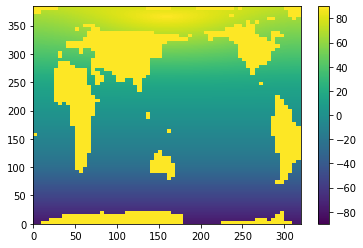

In [28]:
plt.pcolormesh(ds_cesm2.lat.values,vmin=-90,vmax=90)
plt.colorbar()


In [38]:
ds_cesm2.lat.where(lat>30)

NameError: name 'lat' is not defined

In [13]:
ds_mpi = ds_mpi.assign_coords({"time": ("time", time_mpi)})
ds_gfdl = ds_gfdl.assign_coords({"time": ("time", time_gfdl)})
ds_hadGEM3 = ds_hadGEM3.assign_coords({"time": ("time", time_hadGEM3)})

In [14]:
ds_multi = xr.concat([ds_cesm2,ds_mpi,ds_gfdl,ds_hadGEM3], dim="time")

ValueError: arguments without labels along dimension 'nlat' cannot be aligned because they have different dimension sizes: {384, 104}

In [ ]:
ds_multi 

In [125]:
ds_multi.to_netcdf(multi_dir+savefile)

## Take 2: Load detrended, lat cut data: 

In [77]:
def load_sic_data(var, exp_setup):
    fdic = limkb.build_training_dic(exp_setup['valid_dsource'])

    Ptrunc = {}
    var_dict_gfdl_hist = {}
    ntims = len(exp_setup['lags'])
    print('Validation data: '+exp_setup['valid_dsource'])

    tecut = int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid'])

    X_var_gfdl_hist, var_dict_gfdl_hist = limkb.load_data(var, var_dict_gfdl_hist, fdic, 
                                                      remove_climo=exp_setup['remove_climo'], 
                                                      detrend=exp_setup['detrend'], verbose=verbose, 
                                                      tscut=None,#int(exp_setup['nyears_startvalid']/12), 
                                                      tecut=tecut, lat_cutoff=exp_setup['lat_cutoff'][var])
    
    return  X_var_gfdl_hist, var_dict_gfdl_hist, fdic, tecut

In [78]:
ntrunc= 50
#nmodes = 15 # number of coupled EOFs for LIM state space (truncated-state space)
#nmodes = 20
nmodes_sic = 50

lat_cutoff_dict = {'tas':40,'psl':40,'zg':40,'tos':40,'sit':40,'sic':40}

limvars = ['tas','psl','zg','tos','sit','sic']
mo='all'

lags = [0,1,2,3,4,5,6,7,8]

train_dsource = 'cesm_lme'
# train_dsource = 'era5'
# valid_dsource = 'era5'
valid_dsource = 'cesm_lme'

tau = 1

exp_setup = {}
exp_setup['limvars'] = ['tas','psl','zg','tos','sit','sic']
exp_setup['lat_cutoff'] = lat_cutoff_dict
exp_setup['Weight']=True
exp_setup['remove_climo'] = True
exp_setup['detrend'] = True
exp_setup['nyr_train'] = None

yrend = 1650
#yrstart = 1056    # validation 1905-2005, 100 years of validation
yrstart = 1081  # validation 1930-2005, 75 years of validation 
#yrstart = 95  # validation 1915-2015, 75 years of validation 

# #LME settings (in sample): 
exp_setup['nyearsvalid'] = 1000
exp_setup['nyearstrain'] = (yrend-850)
exp_setup['nyears_startvalid'] = 1*12
exp_setup['nyearstot'] = 1155

exp_setup['mo'] = mo
if 'all' in str(mo): 
    exp_setup['ind_month_trunc'] = False
else: 
    exp_setup['ind_month_trunc'] = True
exp_setup['tau'] = tau
exp_setup['train_dsource'] = train_dsource
exp_setup['valid_dsource'] = valid_dsource 
exp_setup['sic_separate'] = True
exp_setup['lags'] = lags
exp_setup['Insamp'] = False
exp_setup['step2_trunc'] = False
exp_setup['ntrunc'] = ntrunc 
exp_setup['nmodes_sic'] = nmodes_sic

verbose = True

In [184]:
var='sic'

In [185]:
train_dsource = 'cesm_lme'
# train_dsource = 'era5'
# valid_dsource = 'era5'
valid_dsource = 'cmip6_cesm2_hist_regridlme'

In [186]:
exp_setup['train_dsource'] = train_dsource
exp_setup['valid_dsource'] = valid_dsource 

exp_setup['nyearsvalid'] = 165
exp_setup['nyearstrain'] = (yrend-850)
exp_setup['nyears_startvalid'] = 1*12
exp_setup['nyearstot'] = 1155

In [187]:
X_var_cesm2_hist, var_dict_cesm2_hist, fdic_cesm2_hist, tecut_cesm2_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_cesm2_hist_regridlme
Loading from sic
Loading from ical/sic_SImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc
time dimension: 1850 - 2014
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found wi

In [188]:
exp_setup['valid_dsource'] = 'cmip6_mpi_hist_regridlme'

X_var_mpi_hist, var_dict_mpi_hist, fdic_mpi_hist, tecut_mpi_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_mpi_hist_regridlme
Loading from sic
Loading from MPI-ESM1-2-LR_historical_r1i1p1f1_regridlme_185001-201412.nc
time dimension: 1850 - 2014
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with

In [189]:
exp_setup['valid_dsource'] = 'cmip6_gfdl_hist_regridlme'

X_var_gfdl_hist, var_dict_gfdl_hist, fdic_gfdl_hist, tecut_gfdl_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_gfdl_hist_regridlme
Loading from sic
Loading from mon_GFDL-ESM4_historical_r1i1p1f1_regridlme_185001-201412.nc
time dimension: 1850 - 2014
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found wit

In [190]:
exp_setup['valid_dsource'] = 'cmip6_HadGEM3_hist_regridlme'

X_var_hadGEM_hist, var_dict_hadGEM_hist, fdic_hadGEM_hist, tecut_hadGEM_hist = load_sic_data(var, exp_setup)

Validation data: cmip6_HadGEM3_hist_regridlme
Loading from sic
Loading from dGEM3-GC31-LL_historical_r1i1p1f3_regridlme_185001-201412.nc
time dimension: 1850 - 2014
latitude cutoff detected: 40
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found 

In [191]:
var_dict_mpi_hist[var]['lon'].shape, var_dict_mpi_hist[var]['lat'].shape

((96, 320), (96, 320))

In [192]:
X_var_all = np.concatenate([X_var_cesm2_hist,X_var_mpi_hist,X_var_gfdl_hist,X_var_hadGEM_hist],axis=1)

In [193]:
X_var_all_3d = np.reshape(X_var_all.T, (7920,96,320))

In [194]:
time_all = np.array([cftime._cftime.DatetimeNoLeap(y, m, 15) for y in range(1850, 1850+(165*4)) for m in range(1, 13)])
time_all

array([cftime._cftime.DatetimeNoLeap(1850, 1, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(1850, 3, 15, 0, 0, 0, 0, -1, 1), ...,
       cftime._cftime.DatetimeNoLeap(2509, 10, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(2509, 11, 15, 0, 0, 0, 0, -1, 1),
       cftime._cftime.DatetimeNoLeap(2509, 12, 15, 0, 0, 0, 0, -1, 1)],
      dtype=object)

In [196]:
multimod_ds = xr.Dataset(data_vars=dict(sic=(['time','nlat','nlon'], X_var_all_3d)),
                         coords=dict(lon=(["nlat","nlon"], var_dict_mpi_hist[var]['lon']),
                                     lat=(["nlat","nlon"], var_dict_mpi_hist[var]['lat']),
                                     time=time_all))
multimod_ds 

<xarray.Dataset>
Dimensions:  (nlat: 96, nlon: 320, time: 7920)
Coordinates:
    lon      (nlat, nlon) float32 320.6 321.7 322.8 323.9 ... nan nan nan nan
    lat      (nlat, nlon) float32 33.95 33.95 33.96 33.96 ... nan nan nan nan
  * time     (time) object 1850-01-15 00:00:00 ... 2509-12-15 00:00:00
Dimensions without coordinates: nlat, nlon
Data variables:
    sic      (time, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [197]:
savefile = var+'_SImon_CESM2_MPI_GFDL_HadGEM3_historical_detrended_latcut40_regridlme_185001-250912.nc'

print('Saving as: '+savefile)

Saving as: sic_SImon_CESM2_MPI_GFDL_HadGEM3_historical_detrended_latcut40_regridlme_185001-250912.nc


In [198]:
multimod_ds.to_netcdf(multi_dir+savefile)

In [ ]:
LIMcast_cesm_lme_ntrain_850_1650_cesm_lme_validy_0851_1050_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202.pkl
LIMcast_cesm_lme_ntrain_850_1650_validyrs       _1651_1850_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202_2.pkl

In [216]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/nvalid/last_millennium/'
filename_lme1 = ('LIMcast_cesm_lme_ntrain_850_1650_cesm_lme_validy_'+
                 '0851_1050_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202.pkl')
filename_lme1 = ('LIMcast_cesm_lme_ntrain_850_1650_cesm_lme_validy_'+
                 '1651_1850_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_20211202.pkl')

experiment_lme1 =  pickle.load(open(data_dir+filename_lme1, 'rb'))
LIMd = experiment_lme1['LIMd']

In [217]:
LIMd.keys()

dict_keys(['vec', 'veci', 'val', 'lam_L', 'C_0', 'C_1', 'Gt', 'lam_L_adj', 'npos_eigenvalues', 'E3', 'W_all', 'standard_factor', 'E3_all', 'E_sic', 'var_dict', 'P_train', 'exp_setup', 'frac_neg_eigenvals'])

In [212]:
np.matmul(LIMd['Gt'],LIMd['Gt']).shape

(300, 300)

In [218]:
LIMd['C_0'].shape

(300, 300)

In [219]:
savefilename = 'LIMd_cesm_lme_002_ntrain_850_1650_validyrs_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_3.pkl'
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/master/'
print('saving in: '+data_dir+savefilename)
pickle.dump(LIMd, open(data_dir+savefilename, "wb" ) )

saving in: /home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/master/LIMd_cesm_lme_002_ntrain_850_1650_validyrs_tas50L40_psl50L40_zg50L40_tos50L40_sit50L40_sic50L40_3.pkl
